In [1]:
#Loading datasets and preprocessing
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit,learning_curve
import warnings
warnings.filterwarnings("ignore") # ignore all warnings

In [2]:
# Load the diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check the shape of the dataset
print("Diabetes Dataset Shape:", diabetes_df.shape)

Diabetes Dataset Shape: (768, 9)


In [5]:
# Check for missing values
print("Missing Values in Diabetes Dataset:\n", diabetes_df.isnull().sum())

Missing Values in Diabetes Dataset:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
age                         0
Outcome                     0
dtype: int64


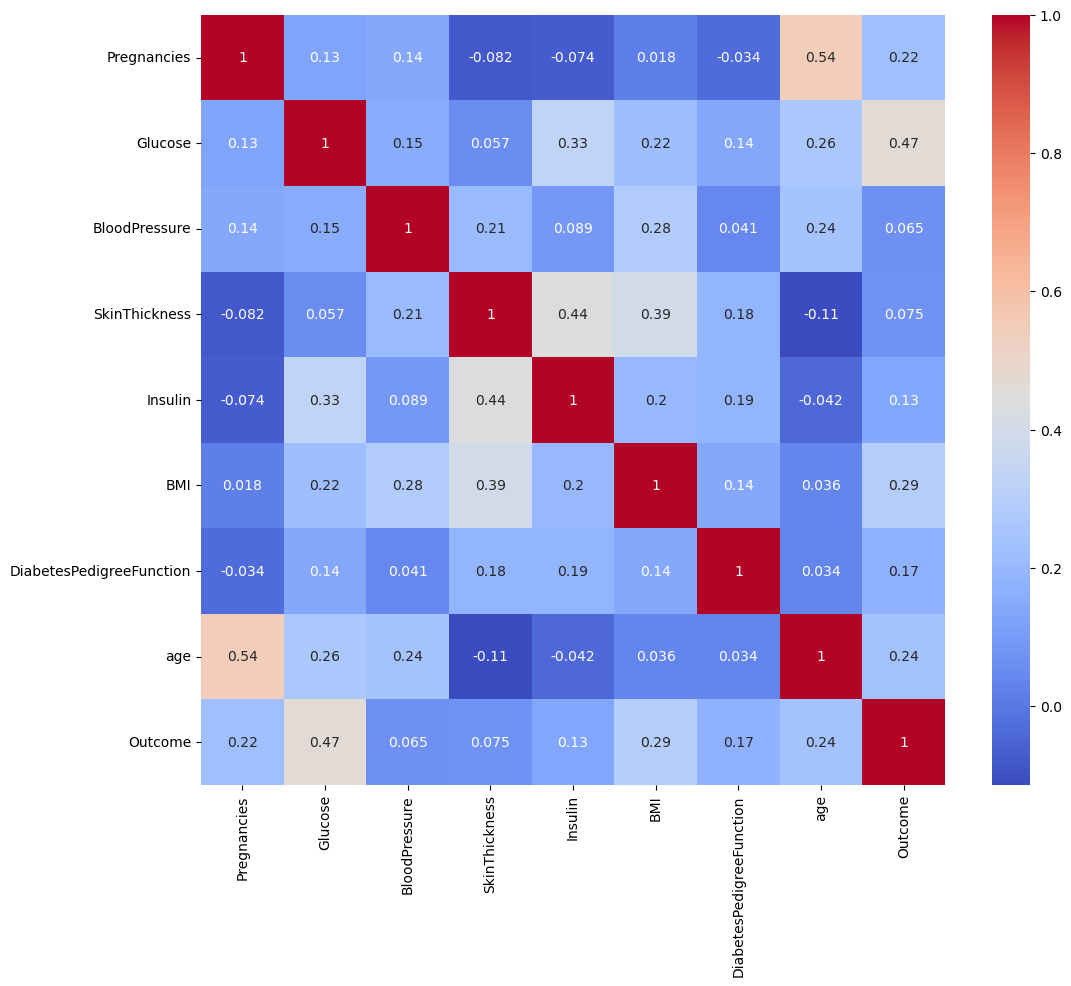

In [6]:
# Plot a correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [3]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Separate the target variable
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

# Perform feature selection using SelectKBest with f_classif score function
best_features = SelectKBest(score_func=f_classif, k=3)
fit = best_features.fit(X, y)

# Get the indices of the selected features
indices = fit.get_support(indices=True)

# Create a new dataframe with the selected features
selected_diab = diabetes_df.iloc[:, indices]
selected_diab['Outcome'] = diabetes_df.iloc[:, -1]

# Train a random forest classifier using the selected features
rf = RandomForestClassifier(random_state=42)
rf.fit(selected_diab.iloc[:, :-1], selected_diab.iloc[:, -1])

# Print the feature importances
feature_importances = pd.DataFrame({'Feature': selected_diab.columns[:-1], 'Importance': rf.feature_importances_})
print(feature_importances)

# Save the selected dataframe to a csv file
selected_diab.to_csv('selected_diabetes_data.csv', index=False)

   Feature  Importance
0  Glucose    0.413123
1      BMI    0.342368
2      age    0.244509


In [4]:
selected_diab

,Glucose,BMI,age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1
...,...,...,...,...
763,101,32.9,63,0
764,122,36.8,27,0
765,121,26.2,30,0
766,126,30.1,47,1


In [5]:
# Load the heart dataset
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
# Check the shape of the dataset
print("Heart Dataset Shape:", heart_df.shape)

Heart Dataset Shape: (1025, 14)


In [11]:
# Check for missing values
print("Missing Values in Heart Dataset:\n", heart_df.isnull().sum())

Missing Values in Heart Dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


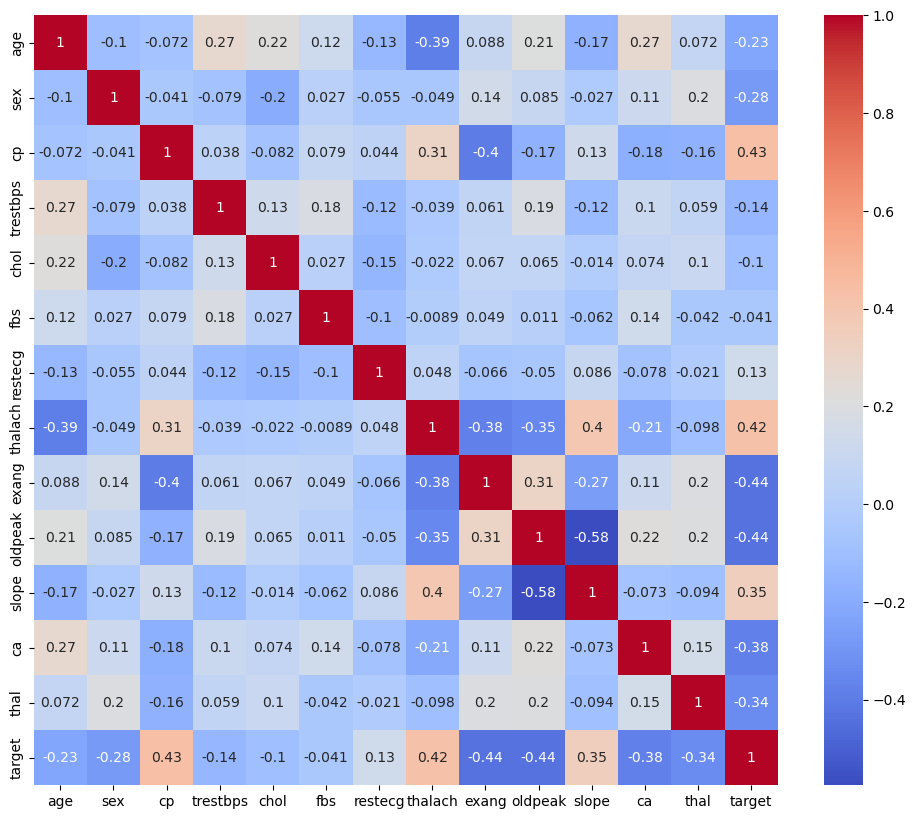

In [12]:
# Plot a correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
#feature selection

import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

# Load the heart dataset
heart_df = pd.read_csv('heart.csv')

# Separate the target variable
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

# Perform feature selection using chi-squared test
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)

# Get the indices of the selected features
indices = fit.get_support(indices=True)

# Create a new dataframe with the selected features
selected_heart = heart_df.iloc[:, indices]
selected_heart['target'] = heart_df.iloc[:, -1]

# Save the selected dataframe to a csv file
selected_heart.to_csv('selected_heart_data.csv', index=False)



In [7]:
selected_heart

,cp,thalach,exang,oldpeak,ca,target
0,0,168,0,1.0,2,0
1,0,155,1,3.1,0,0
2,0,125,1,2.6,0,0
3,0,161,0,0.0,1,0
4,0,106,0,1.9,3,0
...,...,...,...,...,...,...
1020,1,164,1,0.0,0,1
1021,0,141,1,2.8,1,0
1022,0,118,1,1.0,1,0
1023,0,159,0,0.0,0,1


In [8]:
#merging

# Load the selected diabetes dataset
diabetes_df = pd.read_csv('selected_diabetes_data.csv')

# Load the selected heart dataset
heart_df = pd.read_csv('selected_heart_data.csv')

# Merge the datasets
merged_df = pd.concat([diabetes_df, heart_df], axis=1)

# Save the merged dataset to a csv file
merged_df.to_csv('merged_diabetes_heart_features.csv', index=False)

In [9]:
merged_df

,Glucose,BMI,age,Outcome,cp,thalach,exang,oldpeak,ca,target
0,148.0,33.6,50.0,1.0,0,168,0,1.0,2,0
1,85.0,26.6,31.0,0.0,0,155,1,3.1,0,0
2,183.0,23.3,32.0,1.0,0,125,1,2.6,0,0
3,89.0,28.1,21.0,0.0,0,161,0,0.0,1,0
4,137.0,43.1,33.0,1.0,0,106,0,1.9,3,0
...,...,...,...,...,...,...,...,...,...,...
1020,NaN,NaN,NaN,NaN,1,164,1,0.0,0,1
1021,NaN,NaN,NaN,NaN,0,141,1,2.8,1,0
1022,NaN,NaN,NaN,NaN,0,118,1,1.0,1,0
1023,NaN,NaN,NaN,NaN,0,159,0,0.0,0,1


In [10]:
# Check for missing values
print("Missing Values in merged Dataset:\n", merged_df.isnull().sum())

Missing Values in merged Dataset:
 Glucose    257
BMI        257
age        257
Outcome    257
cp           0
thalach      0
exang        0
oldpeak      0
ca           0
target       0
dtype: int64


In [11]:
merged_df = merged_df.dropna()
merged_df

,Glucose,BMI,age,Outcome,cp,thalach,exang,oldpeak,ca,target
0,148.0,33.6,50.0,1.0,0,168,0,1.0,2,0
1,85.0,26.6,31.0,0.0,0,155,1,3.1,0,0
2,183.0,23.3,32.0,1.0,0,125,1,2.6,0,0
3,89.0,28.1,21.0,0.0,0,161,0,0.0,1,0
4,137.0,43.1,33.0,1.0,0,106,0,1.9,3,0
...,...,...,...,...,...,...,...,...,...,...
763,101.0,32.9,63.0,0.0,3,162,0,1.0,0,1
764,122.0,36.8,27.0,0.0,0,144,1,4.0,2,0
765,121.0,26.2,30.0,0.0,0,143,1,3.0,1,0
766,126.0,30.1,47.0,1.0,0,143,1,3.0,1,0


In [13]:
merged_df = merged_df.replace([np.inf, -np.inf], np.finfo(np.float32).max)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df)

print(scaled_data)


[[ 0.84832379  0.20401277  1.4259954  ... -0.04853586  1.18304173
  -1.04802703]
 [-1.12339636 -0.68442195 -0.19067191 ...  1.72247394 -0.7277386
  -1.04802703]
 [ 1.94372388 -1.10325546 -0.10558415 ...  1.30080494 -0.7277386
  -1.04802703]
 ...
 [ 0.00330087 -0.73518964 -0.27575966 ...  1.63814014  0.22765156
  -1.04802703]
 [ 0.1597866  -0.24020459  1.17073215 ...  1.63814014  0.22765156
  -1.04802703]
 [-0.8730192  -0.20212881 -0.87137393 ...  1.97547534  1.18304173
  -1.04802703]]


In [14]:
#Confusion matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Separate the target variable
X = merged_df.iloc[:, :-1]
y = merged_df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict on the testing set
y_pred = rfc.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[61 10]
 [11 72]]


In [15]:
merged_df

,Glucose,BMI,age,Outcome,cp,thalach,exang,oldpeak,ca,target
0,148.0,33.6,50.0,1.0,0,168,0,1.0,2,0
1,85.0,26.6,31.0,0.0,0,155,1,3.1,0,0
2,183.0,23.3,32.0,1.0,0,125,1,2.6,0,0
3,89.0,28.1,21.0,0.0,0,161,0,0.0,1,0
4,137.0,43.1,33.0,1.0,0,106,0,1.9,3,0
...,...,...,...,...,...,...,...,...,...,...
763,101.0,32.9,63.0,0.0,3,162,0,1.0,0,1
764,122.0,36.8,27.0,0.0,0,144,1,4.0,2,0
765,121.0,26.2,30.0,0.0,0,143,1,3.0,1,0
766,126.0,30.1,47.0,1.0,0,143,1,3.0,1,0


In [24]:
#Classification algorithms for all features

#Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X = merged_df.drop(['Outcome', 'target'], axis=1)
y = merged_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)
f1 = round(f1_score(y_test, y_pred)*100,2)

# Print evaluation metrics
print(f'Accuracy:{accuracy}%')
print(f'Precision:{precision}%')
print(f'Recall:{recall}%' )
print(f'F1 score:{f1}%' )

Accuracy:89.61%
Precision:90.36%
Recall:90.36%
F1 score:90.36%


In [18]:
#KNN 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



# Separate the target variable
X = merged_df.drop(['Outcome', 'target'], axis=1)
y = merged_df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))


Accuracy: 69.48%
Precision: 70.93%
Recall: 73.49%
F1 Score: 72.19%


In [19]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier


# Load the merged dataset
df = pd.read_csv('merged_diabetes_heart_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())
# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = merged_df.drop(['Outcome', 'target'], axis=1)
y = merged_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree classifier and fit the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 81.82%
Precision: 83.74%
Recall: 82.40%
F1 score: 83.06%


In [20]:
#Grdient boosting

from sklearn.ensemble import GradientBoostingClassifier


# Load the merged dataset
df = pd.read_csv('merged_diabetes_heart_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())
# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = merged_df.drop(['Outcome', 'target'], axis=1)
y = merged_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Gradient Boosting classifier and fit the training data
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 85.71%
Precision: 87.70%
Recall: 85.60%
F1 score: 86.64%


In [21]:
#Logistic regression

from sklearn.linear_model import LogisticRegression


# Load the merged dataset
df = pd.read_csv('merged_diabetes_heart_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())
# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = merged_df.drop(['Outcome', 'target'], axis=1)
y = merged_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Logistic Regression classifier and fit the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 81.39%
Precision: 81.54%
Recall: 84.80%
F1 score: 83.14%


In [22]:
#SVM

from sklearn.svm import SVC


# Load the merged dataset
df = pd.read_csv('merged_diabetes_heart_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = merged_df.drop(['Outcome', 'target'], axis=1)
y = merged_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the SVM classifier and fit the training data
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 76.19%
Precision: 77.34%
Recall: 79.20%
F1 score: 78.26%


In [23]:
#Hybrid RFLR

from sklearn.impute import SimpleImputer


# Load merged dataset
data = pd.read_csv('merged_diabetes_heart_features.csv')

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)

# Clip values to a certain range
clipped_data = np.clip(imputed_data, -100, 100)

# Convert NumPy array to pandas DataFrame
clipped_data_df = pd.DataFrame(clipped_data, columns=data.columns)

# Split dataset into training and testing sets
train_data = clipped_data_df.sample(frac=0.8, random_state=1)
test_data = clipped_data_df.drop(train_data.index)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(train_data.drop('target', axis=1), train_data['target'])

# Generate predicted probabilities using Random Forest model
rf_probs = rf_model.predict_proba(test_data.drop('target', axis=1))[:, 1]

# Train Logistic Regression model using predicted probabilities
lr_model = LogisticRegression()
lr_model.fit(rf_probs.reshape(-1, 1), test_data['target'])

# Generate final predictions using Random Forest and Logistic Regression models
final_probs = rf_model.predict_proba(clipped_data_df.drop('target', axis=1))[:, 1]
final_preds = lr_model.predict(final_probs.reshape(-1, 1))

# Compute evaluation metrics
accuracy = accuracy_score(clipped_data_df['target'], final_preds)
precision = precision_score(clipped_data_df['target'], final_preds)
recall = recall_score(clipped_data_df['target'], final_preds)
f1 = f1_score(clipped_data_df['target'], final_preds)

# Print evaluation metrics
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}%'.format(precision * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print('F1 Score: {:.2f}%'.format(f1 * 100))


Accuracy: 95.80%
Precision: 95.14%
Recall: 96.77%
F1 Score: 95.95%


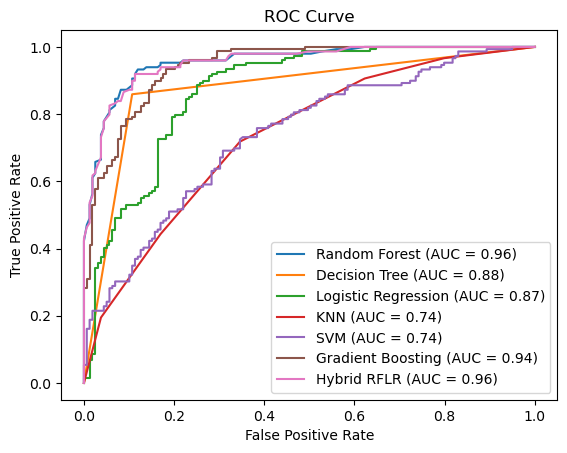

In [42]:
#ROC curve

from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve,auc

# Load the merged dataset
df = pd.read_csv('merged_diabetes_heart_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = df.drop(['target'], axis=1) # assume target column is 'target'
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the classifiers to use
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42, probability=True)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Hybrid RFLR', make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)))
]

# Create the ROC curve for each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [17]:
from sklearn.inspection import permutation_importance

# Load the heart dataset
df = pd.read_csv('merged_diabetes_heart_features.csv')

df = df.dropna()

# Split the data into features (X) and target (y)
X = merged_df.drop(['Outcome', 'target'], axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_importance = rf_clf.feature_importances_

# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_importance = dt_clf.feature_importances_

# SVM
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
svm_importance = np.abs(svm_clf.coef_).mean(axis=0)

# Logistic Regression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
lr_importance = np.abs(lr_clf.coef_).mean(axis=0)

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
gb_importance = gb_clf.feature_importances_

# KNN
# Train KNN model and obtain feature importances using permutation feature importance
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_importances = permutation_importance(knn_model, X_test, y_test, random_state=1).importances_mean

# Create a dataframe to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest': rf_importance,
    'Decision Tree': dt_importance,
    'SVM': svm_importance,
    'Logistic Regression': lr_importance,
    'Gradient Boosting': gb_importance,
    'K nearest neighbour':knn_importances
})

# Set the 'Feature' column as the index
feature_importance_df.set_index('Feature', inplace=True)

for algorithm in feature_importance_df.columns:
    plt.figure(figsize=(4, 4))
    plt.barh(feature_importance_df.index, feature_importance_df[algorithm])
    plt.title(f'{algorithm} Feature Importances')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

NameError: name 'DecisionTreeClassifier' is not defined

In [63]:
#classification algorithm for important features.
df = pd.read_csv('merged_diabetes_heart_features.csv')  
selected_cols = ['cp', 'ca', 'oldpeak', 'exang','target','Outcome']
imp_features = df[selected_cols]
# Save the selected columns to a CSV file
imp_features.to_csv('imp_features.csv', index=False)
imp_features

,cp,ca,oldpeak,exang,target,Outcome
0,0,2,1.0,0,0,1.0
1,0,0,3.1,1,0,0.0
2,0,0,2.6,1,0,1.0
3,0,1,0.0,0,0,0.0
4,0,3,1.9,0,0,1.0
...,...,...,...,...,...,...
1020,1,0,0.0,1,1,NaN
1021,0,1,2.8,1,0,NaN
1022,0,1,1.0,1,0,NaN
1023,0,0,0.0,0,1,NaN


In [65]:
imp_features = imp_features.dropna()
imp_features

,cp,ca,oldpeak,exang,target,Outcome
0,0,2,1.0,0,0,1.0
1,0,0,3.1,1,0,0.0
2,0,0,2.6,1,0,1.0
3,0,1,0.0,0,0,0.0
4,0,3,1.9,0,0,1.0
...,...,...,...,...,...,...
763,3,0,1.0,0,1,0.0
764,0,2,4.0,1,0,0.0
765,0,1,3.0,1,0,0.0
766,0,1,3.0,1,0,1.0


In [66]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
df.fillna(df.mean(), inplace=True)
imp_features = imp_features.dropna()
imp_features

,cp,ca,oldpeak,exang,target,Outcome
0,0,2,1.0,0,0,1.0
1,0,0,3.1,1,0,0.0
2,0,0,2.6,1,0,1.0
3,0,1,0.0,0,0,0.0
4,0,3,1.9,0,0,1.0
...,...,...,...,...,...,...
763,3,0,1.0,0,1,0.0
764,0,2,4.0,1,0,0.0
765,0,1,3.0,1,0,0.0
766,0,1,3.0,1,0,1.0


In [25]:
#Random forest


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
# Separate the target variable
X = df.drop(['Outcome', 'target'], axis=1)  # Drop the outcome and target columns from the dataset
y = df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)
f1 = round(f1_score(y_test, y_pred)*100,2)

# Print evaluation metrics
print(f'Accuracy:{accuracy}%')
print(f'Precision:{precision}%')
print(f'Recall:{recall}%' )
print(f'F1 score:{f1}%' )

Accuracy:88.64%
Precision:85.62%
Recall:91.95%
F1 score:88.67%


In [26]:
#KNN 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Separate the target variable
X = df.drop(['Outcome', 'target'], axis=1)  # Drop the outcome and target columns from the dataset
y = df['target'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))


Accuracy: 68.51%
Precision: 66.05%
Recall: 71.81%
F1 Score: 68.81%


In [27]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier


# Load the merged dataset
X = df.drop(['Outcome', 'target'], axis=1)  # Drop the outcome and target columns from the dataset
y = df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree classifier and fit the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 86.69%
Precision: 89.13%
Recall: 82.55%
F1 score: 85.71%


In [28]:
#Grdient boosting

from sklearn.ensemble import GradientBoostingClassifier

X = df.drop(['Outcome', 'target'], axis=1)  # Drop the outcome and target columns from the dataset
y = df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Gradient Boosting classifier and fit the training data
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 86.36%
Precision: 84.08%
Recall: 88.59%
F1 score: 86.27%


In [29]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 81.17%
Precision: 76.30%
Recall: 88.59%
F1 score: 81.99%


In [30]:
#SVM

from sklearn.svm import SVC

# Create the SVM classifier and fit the training data
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')

Accuracy: 67.86%
Precision: 64.88%
Recall: 73.15%
F1 score: 68.77%


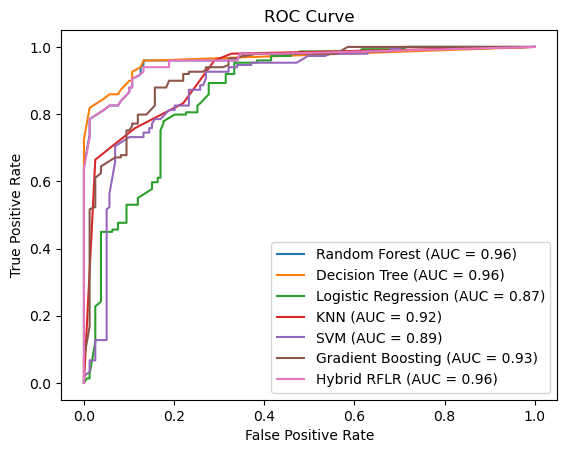

In [31]:
#ROC curve

from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve,auc

# Load the merged dataset
df = pd.read_csv('imp_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the classifiers to use
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42, probability=True)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Hybrid RFLR', make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)))
]

# Create the ROC curve for each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [32]:
#classification algorithm for remaining features
# Select all columns except 'cp', 'ca', 'oldpeak', and 'exang'

df = pd.read_csv('merged_diabetes_heart_features.csv') 
remaining_cols = df.columns.difference(['cp', 'ca', 'oldpeak', 'exang'])
rem_features = df[remaining_cols]

# Save the remaining features to a CSV file
rem_features.to_csv('rem_features.csv', index=False)

rem_features

,BMI,Glucose,Outcome,age,target,thalach
0,33.6,148.0,1.0,50.0,0,168
1,26.6,85.0,0.0,31.0,0,155
2,23.3,183.0,1.0,32.0,0,125
3,28.1,89.0,0.0,21.0,0,161
4,43.1,137.0,1.0,33.0,0,106
...,...,...,...,...,...,...
1020,NaN,NaN,NaN,NaN,1,164
1021,NaN,NaN,NaN,NaN,0,141
1022,NaN,NaN,NaN,NaN,0,118
1023,NaN,NaN,NaN,NaN,1,159


In [82]:
# Check for missing values
print("Missing Values in this Dataset:\n", rem_features.isnull().sum())

Missing Values in this Dataset:
 BMI        257
Glucose    257
Outcome    257
age        257
target       0
thalach      0
dtype: int64


In [33]:
rem_features = rem_features.dropna()
rem_features

,BMI,Glucose,Outcome,age,target,thalach
0,33.6,148.0,1.0,50.0,0,168
1,26.6,85.0,0.0,31.0,0,155
2,23.3,183.0,1.0,32.0,0,125
3,28.1,89.0,0.0,21.0,0,161
4,43.1,137.0,1.0,33.0,0,106
...,...,...,...,...,...,...
763,32.9,101.0,0.0,63.0,1,162
764,36.8,122.0,0.0,27.0,0,144
765,26.2,121.0,0.0,30.0,0,143
766,30.1,126.0,1.0,47.0,0,143


In [34]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X = rem_features.drop(['Outcome', 'target'], axis=1)
y = rem_features['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)
f1 = round(f1_score(y_test, y_pred)*100,2)

# Print evaluation metrics
print(f'Accuracy:{accuracy}%')
print(f'Precision:{precision}%')
print(f'Recall:{recall}%' )
print(f'F1 score:{f1}%' )

Accuracy:72.08%
Precision:75.0%
Recall:72.29%
F1 score:73.62%


In [35]:
#KNN 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))


Accuracy: 70.13%
Precision: 75.34%
Recall: 66.27%
F1 Score: 70.51%


In [36]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree classifier and fit the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 64.94%
Precision: 71.64%
Recall: 57.83%
F1 score: 64.00%


In [37]:
#Grdient boosting

from sklearn.ensemble import GradientBoostingClassifier
# Create the Gradient Boosting classifier and fit the training data
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 76.62%
Precision: 81.33%
Recall: 73.49%
F1 score: 77.22%


In [38]:
#Logistic regression

from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression classifier and fit the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 79.22%
Precision: 78.65%
Recall: 84.34%
F1 score: 81.40%


In [39]:
#SVM

from sklearn.svm import SVC
# Create the SVM classifier and fit the training data
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')


Accuracy: 74.68%
Precision: 78.21%
Recall: 73.49%
F1 score: 75.78%


In [40]:
#Hybrid RFLR

from sklearn.impute import SimpleImputer

# Load merged dataset
data = pd.read_csv('rem_features.csv')

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)

# Clip values to a certain range
clipped_data = np.clip(imputed_data, -100, 100)

# Convert NumPy array to pandas DataFrame
clipped_data_df = pd.DataFrame(clipped_data, columns=data.columns)

# Split dataset into training and testing sets
train_data = clipped_data_df.sample(frac=0.8, random_state=1)
test_data = clipped_data_df.drop(train_data.index)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(train_data.drop('target', axis=1), train_data['target'])

# Generate predicted probabilities using Random Forest model
rf_probs = rf_model.predict_proba(test_data.drop('target', axis=1))[:, 1]

# Train Logistic Regression model using predicted probabilities
lr_model = LogisticRegression()
lr_model.fit(rf_probs.reshape(-1, 1), test_data['target'])

# Generate final predictions using Random Forest and Logistic Regression models
final_probs = rf_model.predict_proba(clipped_data_df.drop('target', axis=1))[:, 1]
final_preds = lr_model.predict(final_probs.reshape(-1, 1))

# Compute evaluation metrics
accuracy = accuracy_score(clipped_data_df['target'], final_preds)
precision = precision_score(clipped_data_df['target'], final_preds)
recall = recall_score(clipped_data_df['target'], final_preds)
f1 = f1_score(clipped_data_df['target'], final_preds)

# Print evaluation metrics
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}%'.format(precision * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print('F1 Score: {:.2f}%'.format(f1 * 100))


Accuracy: 76.88%
Precision: 69.61%
Recall: 97.53%
F1 Score: 81.24%


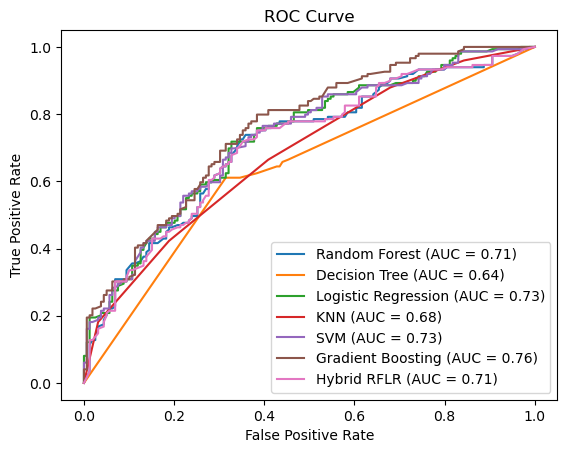

In [41]:
#ROC curve

from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve,auc

# Load the merged dataset
df = pd.read_csv('rem_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the classifiers to use
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42, probability=True)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Hybrid RFLR', make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)))
]

# Create the ROC curve for each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [42]:
#ranking of features

from sklearn.feature_selection import SelectKBest, f_classif

df = pd.read_csv('merged_diabetes_heart_features.csv') 

# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']

# Use SelectKBest to rank the features
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Print the indices of the selected features in ranked order
print("Ranking of features:")
for i in range(len(selected_features)):
    print("{}. {}".format(i+1, X.columns[selected_features[i]]))


Ranking of features:
1. Glucose
2. BMI
3. age
4. cp
5. thalach
6. exang
7. oldpeak
8. ca


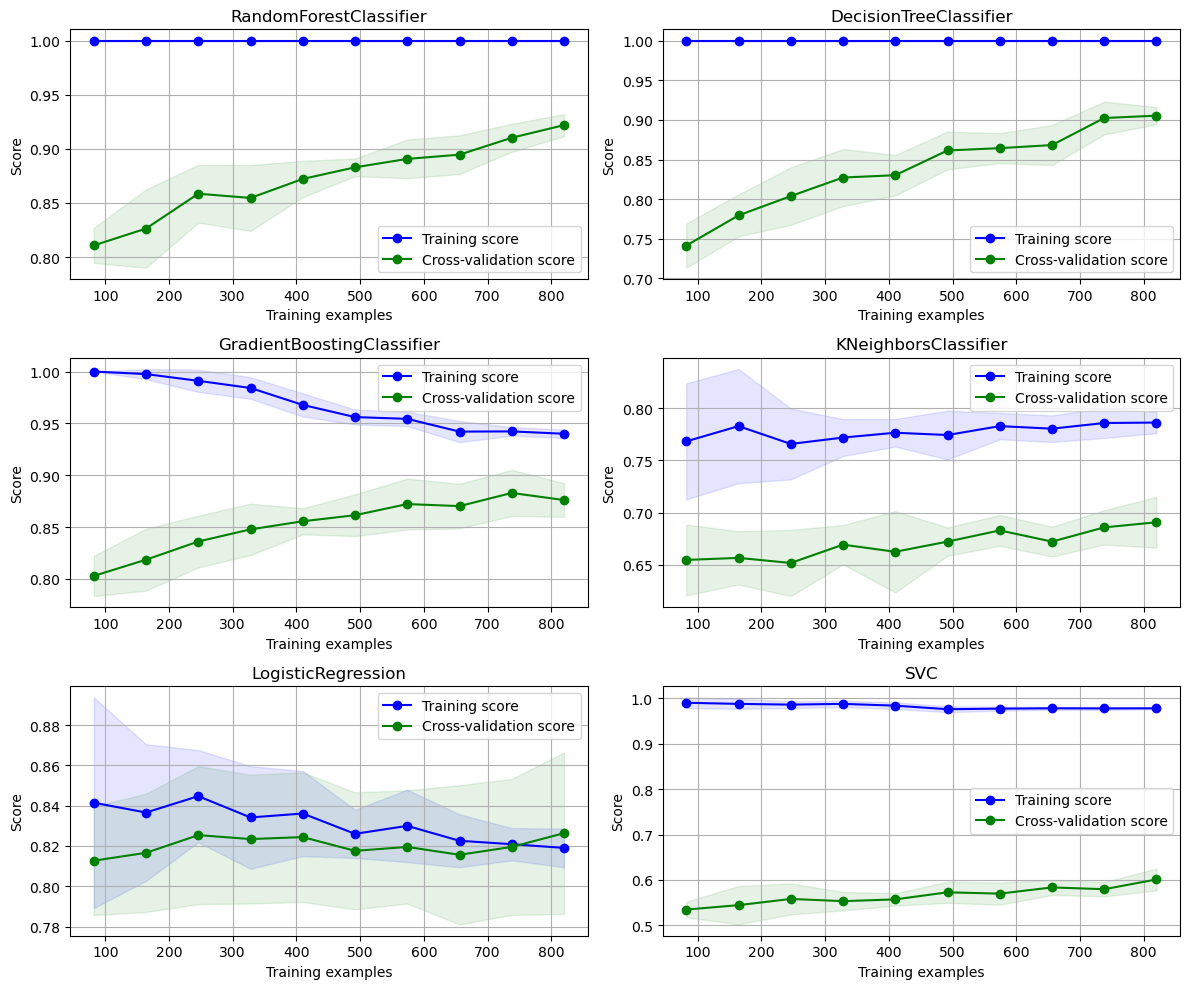

In [104]:
#Learning curve for all features 
# Load the merged dataset
df = pd.read_csv('merged_diabetes_heart_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']


# Define the models to evaluate
models = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(kernel='rbf', C=1, gamma='auto')
]

# Set up the learning curve parameters
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curves for each model
plt.figure(figsize=(12, 10))
for i, model in enumerate(models):
    plt.subplot(3, 2, i + 1)
    plt.title(type(model).__name__)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

plt.tight_layout()
plt.show()


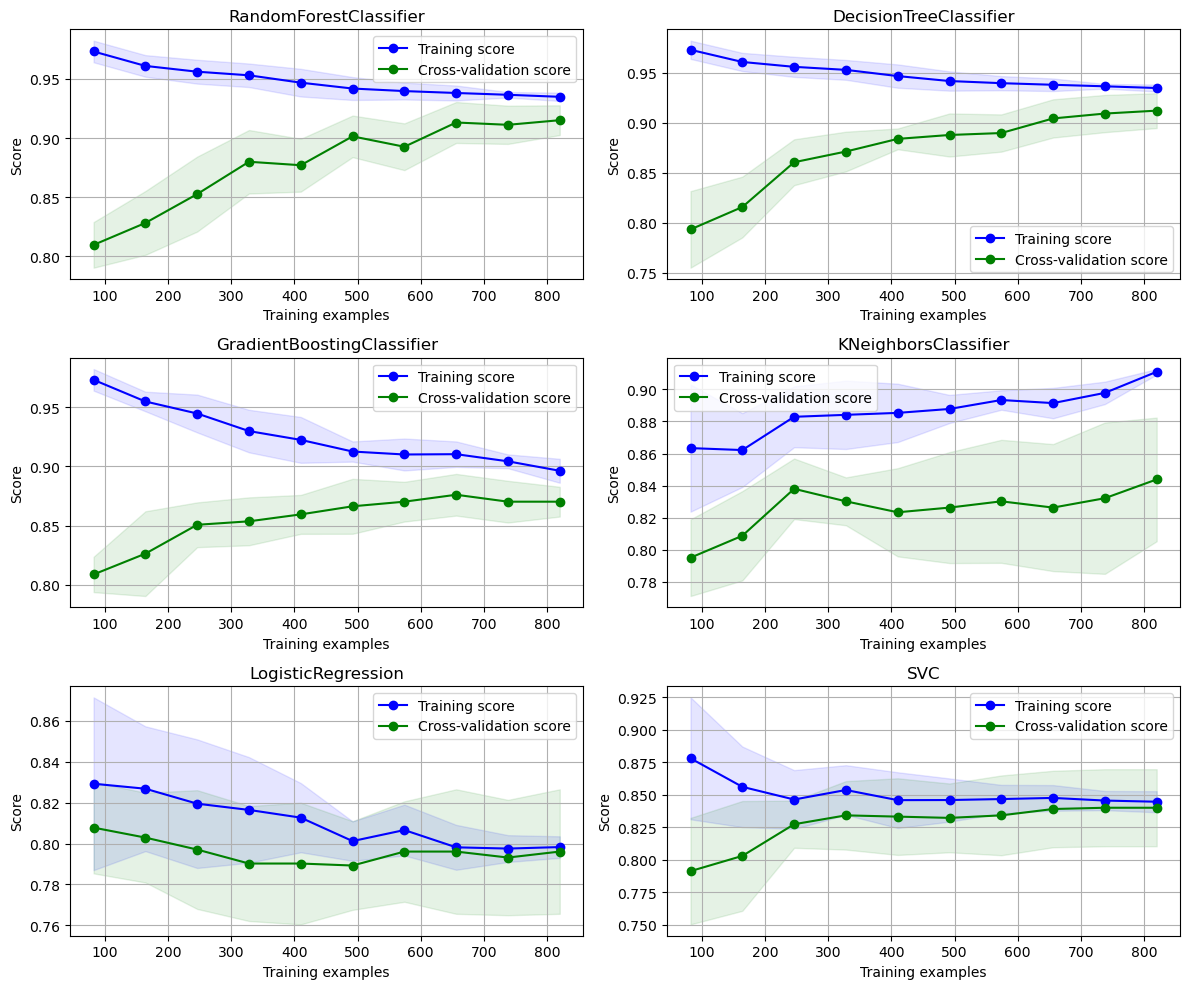

In [105]:
#Learning curve for Important features
# Load the dataset
df = pd.read_csv('imp_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']


# Define the models to evaluate
models = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(kernel='rbf', C=1, gamma='auto')
]

# Set up the learning curve parameters
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curves for each model
plt.figure(figsize=(12, 10))
for i, model in enumerate(models):
    plt.subplot(3, 2, i + 1)
    plt.title(type(model).__name__)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")

plt.tight_layout()
plt.show()


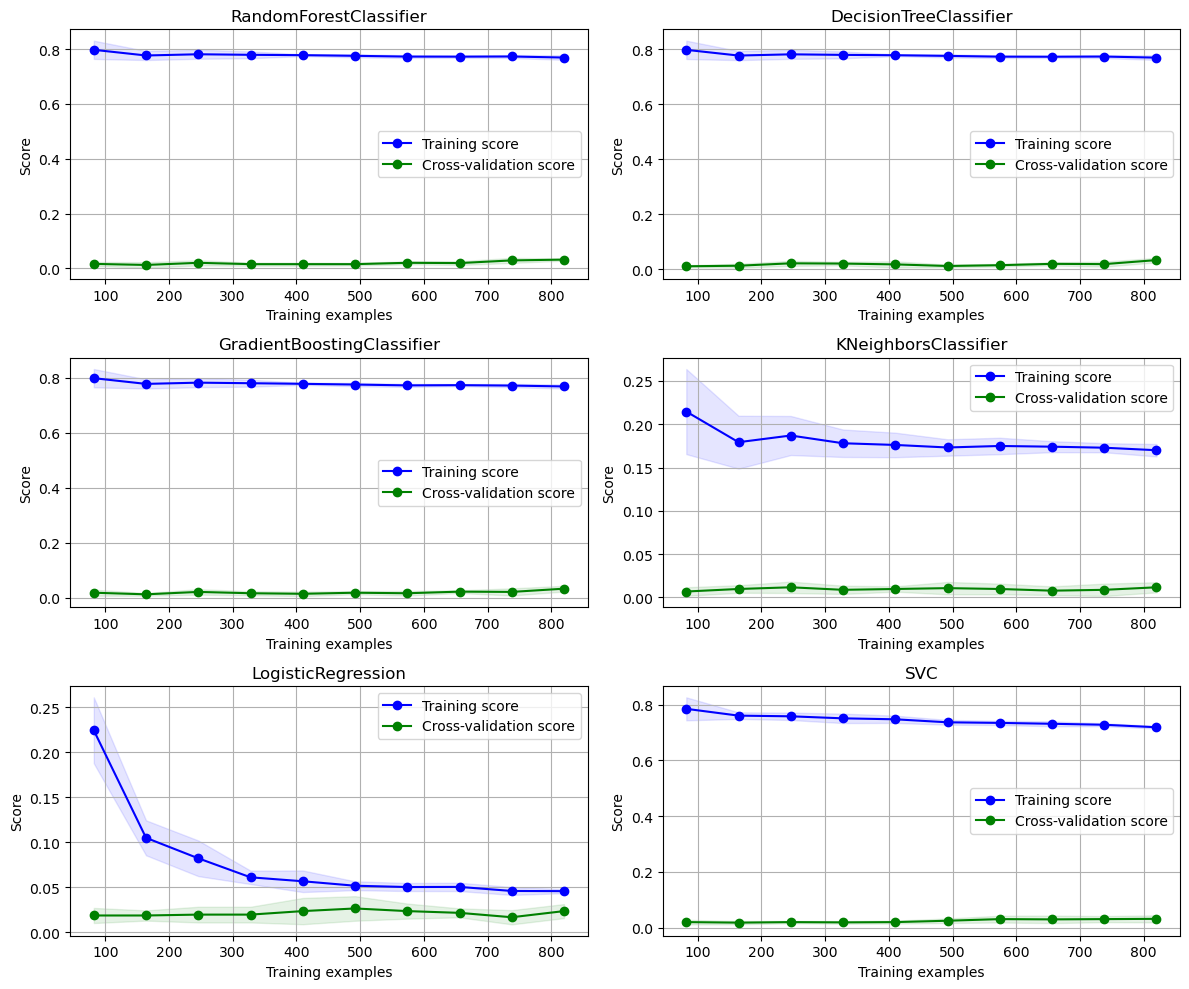

In [58]:
#Learning curve for remaining features
# Load the dataset
df = pd.read_csv('rem_features.csv')

# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Split the dataset into training and testing sets
X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']


# Define the models to evaluate
models = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(kernel='rbf', C=1, gamma='auto')
]

# Set up the learning curve parameters
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curves for each model
plt.figure(figsize=(12, 10))
for i, model in enumerate(models):
    plt.subplot(3, 2, i + 1)
    plt.title(type(model).__name__)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [106]:
#Stacking accuracy for important features

df = pd.read_csv('imp_features.csv')
# Identify and impute missing values with mean
df = df.fillna(df.mean())

# Identify and remove infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()


# Split the dataset into training and testing sets
X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']
# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def meta_c(a):
    # Meta-classifier (stacking)
    meta_classifier = LogisticRegression(random_state=42)

    # Fit the base classifiers on the training data
    base_classifier1.fit(X_train, y_train)
    base_classifier2.fit(X_train, y_train)

    # Make predictions on the test data for base classifiers
    base1_pred = base_classifier1.predict(X_test)
    base2_pred = base_classifier2.predict(X_test)

    # Stack the predictions of base classifiers
    stacked_X_test = np.column_stack((base1_pred, base2_pred))

    # Fit the meta-classifier on the stacked predictions and make final predictions
    meta_classifier.fit(stacked_X_test, y_test)
    stacked_pred = meta_classifier.predict(stacked_X_test)

    # Calculate the accuracy of the stacked ensemble
    accuracy = accuracy_score(y_test, stacked_pred)
    print(f'Stacked Ensemble Accuracy of {a}: {round(accuracy*100,3)}%')

# First-level base classifiers
base_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)
base_classifier2 = RandomForestClassifier(n_estimators=200, random_state=42)
meta_c("Random forest")

base_classifier1 = DecisionTreeClassifier(max_depth=3, random_state=42)
base_classifier2 = DecisionTreeClassifier(max_depth=5, random_state=42)
meta_c("Decision Tree")

base_classifier1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
base_classifier2 = GradientBoostingClassifier(n_estimators=200, random_state=42)
meta_c("Gradient boosting")

base_classifier1 = KNeighborsClassifier(n_neighbors=5)
base_classifier2 = KNeighborsClassifier(n_neighbors=10)
meta_c("KNN")

base_classifier1 = LogisticRegression(random_state=42, max_iter=1000)
base_classifier2 = DecisionTreeClassifier(random_state=42)
meta_c("Logistic regression")

base_classifier1 = SVC(kernel='linear', random_state=42)
base_classifier2 = SVC(kernel='rbf', random_state=42)
meta_c("SVM")

Stacked Ensemble Accuracy of Random forest: 90.244%
Stacked Ensemble Accuracy of Decision Tree: 82.927%
Stacked Ensemble Accuracy of Gradient boosting: 87.805%
Stacked Ensemble Accuracy of KNN: 80.488%
Stacked Ensemble Accuracy of Logistic regression: 90.244%
Stacked Ensemble Accuracy of SVM: 80.0%


# Unsupervised algorithm 

In [110]:
#Gaussian distribution normalization
# Load the merged dataset
df = pd.read_csv('merged_diabetes_heart_features.csv')
df.fillna(df.mean(), inplace=True)
df = df.dropna()
df

,Glucose,BMI,age,Outcome,cp,thalach,exang,oldpeak,ca,target
0,148.000000,33.600000,50.000000,1.000000,0,168,0,1.0,2,0
1,85.000000,26.600000,31.000000,0.000000,0,155,1,3.1,0,0
2,183.000000,23.300000,32.000000,1.000000,0,125,1,2.6,0,0
3,89.000000,28.100000,21.000000,0.000000,0,161,0,0.0,1,0
4,137.000000,43.100000,33.000000,1.000000,0,106,0,1.9,3,0
...,...,...,...,...,...,...,...,...,...,...
1020,120.894531,31.992578,33.240885,0.348958,1,164,1,0.0,0,1
1021,120.894531,31.992578,33.240885,0.348958,0,141,1,2.8,1,0
1022,120.894531,31.992578,33.240885,0.348958,0,118,1,1.0,1,0
1023,120.894531,31.992578,33.240885,0.348958,0,159,0,0.0,0,1


In [111]:
# Extract variables to be normalized
var1 = df['Glucose']  
var2 = df['BMI']  
var3 = df['age']  
var4 = df['cp']
var5 = df['thalach']
var6 = df['exang'] 
var7 = df['oldpeak'] 
var8 = df['ca'] 
var9 = df['Outcome']
var10 = df['target']

# Calculate mean and standard deviation for each variable
mean_var1 = np.mean(var1)
std_var1 = np.std(var1)
mean_var2 = np.mean(var2)
std_var2 = np.std(var2)
mean_var3 = np.mean(var3)
std_var3 = np.std(var3)
mean_var4 = np.mean(var4)
std_var4 = np.std(var4)
mean_var5 = np.mean(var5)
std_var5= np.std(var5)
mean_var6 = np.mean(var6)
std_var6 = np.std(var6)
mean_var7 = np.mean(var7)
std_var7 = np.std(var7)
mean_var8 = np.mean(var8)
std_var8 = np.std(var8)

# Normalize variables using Gaussian distribution function
var1_normalized = (var1 - mean_var1) / std_var1
var2_normalized = (var2 - mean_var2) / std_var2
var3_normalized = (var3 - mean_var3) / std_var3
var4_normalized = (var4 - mean_var4) / std_var4
var5_normalized = (var5 - mean_var5) / std_var5
var6_normalized = (var6 - mean_var6) / std_var6
var7_normalized = (var7 - mean_var7) / std_var7
var8_normalized = (var8 - mean_var8) / std_var8

# Create a new DataFrame to store the normalized data
normalized_data = pd.DataFrame({'Glucose_normalized': var1_normalized,
                                'BMI_normalized': var2_normalized,
                              	'age_normalized': var3_normalized,
                                'cp_normalized': var4_normalized,
                                'thalach_normalized': var5_normalized,
                                'exang_normalized': var6_normalized,
                                'oldpeak_normalized': var7_normalized,
                                'ca_normalized': var8_normalized,
                                'target':var9,
                                'Outcome':var10})


normalized_data


,Glucose_normalized,BMI_normalized,age_normalized,cp_normalized,thalach_normalized,exang_normalized,oldpeak_normalized,ca_normalized,target,Outcome
0,0.980038,2.356887e-01,1.647401e+00,-0.915755,0.821321,-0.712287,-0.060888,1.209221,1.000000,0
1,-1.297820,-7.906882e-01,-2.202764e-01,-0.915755,0.255968,1.403928,1.727137,-0.731971,0.000000,0
2,2.245515,-1.274552e+00,-1.219776e-01,-0.915755,-1.048692,1.403928,1.301417,-0.731971,1.000000,0
3,-1.153194,-5.707503e-01,-1.203265e+00,-0.915755,0.516900,-0.712287,-0.912329,0.238625,0.000000,0
4,0.582317,1.628629e+00,-2.367876e-02,-0.915755,-1.874977,-0.712287,0.705408,2.179817,1.000000,0
...,...,...,...,...,...,...,...,...,...,...
1020,0.000000,5.261268e-14,-1.676293e-14,0.055931,0.647366,1.403928,-0.912329,-0.731971,0.348958,1
1021,0.000000,5.261268e-14,-1.676293e-14,-0.915755,-0.352873,1.403928,1.471705,0.238625,0.348958,0
1022,0.000000,5.261268e-14,-1.676293e-14,-0.915755,-1.353113,1.403928,-0.060888,0.238625,0.348958,0
1023,0.000000,5.261268e-14,-1.676293e-14,-0.915755,0.429923,-0.712287,-0.912329,-0.731971,0.348958,1


In [112]:
normalized_data.to_csv('normalized_all_features.csv', index=False)

In [114]:
df = pd.read_csv('imp_features.csv')
df.fillna(df.mean(), inplace=True)
df = df.dropna()
df

,cp,ca,oldpeak,exang,target,Outcome
0,0,2,1.0,0,0,1.000000
1,0,0,3.1,1,0,0.000000
2,0,0,2.6,1,0,1.000000
3,0,1,0.0,0,0,0.000000
4,0,3,1.9,0,0,1.000000
...,...,...,...,...,...,...
1020,1,0,0.0,1,1,0.348958
1021,0,1,2.8,1,0,0.348958
1022,0,1,1.0,1,0,0.348958
1023,0,0,0.0,0,1,0.348958


In [115]:
# Extract variables to be normalized
var1 = df['cp']  
var2 = df['ca']  
var3 = df['oldpeak']  
var4 = df['exang']
var5 = df['target']
var6 = df['Outcome'] 
# Calculate mean and standard deviation for each variable
mean_var1 = np.mean(var1)
std_var1 = np.std(var1)
mean_var2 = np.mean(var2)
std_var2 = np.std(var2)
mean_var3 = np.mean(var3)
std_var3 = np.std(var3)
mean_var4 = np.mean(var4)
std_var4 = np.std(var4)

# Normalize variables using Gaussian distribution function
var1_normalized = (var1 - mean_var1) / std_var1
var2_normalized = (var2 - mean_var2) / std_var2
var3_normalized = (var3 - mean_var3) / std_var3
var4_normalized = (var4 - mean_var4) / std_var4

# Create a new DataFrame to store the normalized data
normalized_data = pd.DataFrame({'cp_normalized': var1_normalized,
                                'ca_normalized': var2_normalized,
                              	'oldpeak_normalized': var3_normalized,
                                'exang_normalized': var4_normalized,
                                'target':var5,
                                'Outcome':var6})


normalized_data

,cp_normalized,ca_normalized,oldpeak_normalized,exang_normalized,target,Outcome
0,-0.915755,1.209221,-0.060888,-0.712287,0,1.000000
1,-0.915755,-0.731971,1.727137,1.403928,0,0.000000
2,-0.915755,-0.731971,1.301417,1.403928,0,1.000000
3,-0.915755,0.238625,-0.912329,-0.712287,0,0.000000
4,-0.915755,2.179817,0.705408,-0.712287,0,1.000000
...,...,...,...,...,...,...
1020,0.055931,-0.731971,-0.912329,1.403928,1,0.348958
1021,-0.915755,0.238625,1.471705,1.403928,0,0.348958
1022,-0.915755,0.238625,-0.060888,1.403928,0,0.348958
1023,-0.915755,-0.731971,-0.912329,-0.712287,1,0.348958


In [116]:
normalized_data.to_csv('normalized_imp_features.csv', index=False)

In [127]:
#remainig features

df = pd.read_csv('rem_features.csv')
df.fillna(df.mean(), inplace=True)
df = df.dropna()
df

,BMI,Glucose,Outcome,age,target,thalach
0,33.600000,148.000000,1.000000,50.000000,0,168
1,26.600000,85.000000,0.000000,31.000000,0,155
2,23.300000,183.000000,1.000000,32.000000,0,125
3,28.100000,89.000000,0.000000,21.000000,0,161
4,43.100000,137.000000,1.000000,33.000000,0,106
...,...,...,...,...,...,...
1020,31.992578,120.894531,0.348958,33.240885,1,164
1021,31.992578,120.894531,0.348958,33.240885,0,141
1022,31.992578,120.894531,0.348958,33.240885,0,118
1023,31.992578,120.894531,0.348958,33.240885,1,159


In [128]:
# Extract variables to be normalized
var1 = df['BMI']  
var2 = df['Glucose']  
var3 = df['Outcome'] 
var4 = df['age'] 
var5 = df['target']
var6 = df['thalach']


# Calculate mean and standard deviation for each variable
mean_var1 = np.mean(var1)
std_var1 = np.std(var1)
mean_var2 = np.mean(var2)
std_var2 = np.std(var2)
mean_var4 = np.mean(var4)
std_var4 = np.std(var4)
mean_var6 = np.mean(var6)
std_var6 = np.std(var6)


# Normalize variables using Gaussian distribution function
var1_normalized = (var1 - mean_var1) / std_var1
var2_normalized = (var2 - mean_var2) / std_var2
var4_normalized = (var4 - mean_var4) / std_var4
var6_normalized = (var6 - mean_var6) / std_var6


# Create a new DataFrame to store the normalized data
normalized_data = pd.DataFrame({'BMI_normalized': var1_normalized,
                                'Glucose_normalized': var2_normalized,
                              	'Outcome':var3,
                                'age_normalized': var4_normalized,
                                'target':var5,
                                'thalach_normalized':var6_normalized})


normalized_data

,BMI_normalized,Glucose_normalized,Outcome,age_normalized,target,thalach_normalized
0,2.356887e-01,0.980038,1.000000,1.647401e+00,0,0.821321
1,-7.906882e-01,-1.297820,0.000000,-2.202764e-01,0,0.255968
2,-1.274552e+00,2.245515,1.000000,-1.219776e-01,0,-1.048692
3,-5.707503e-01,-1.153194,0.000000,-1.203265e+00,0,0.516900
4,1.628629e+00,0.582317,1.000000,-2.367876e-02,0,-1.874977
...,...,...,...,...,...,...
1020,5.261268e-14,0.000000,0.348958,-1.676293e-14,1,0.647366
1021,5.261268e-14,0.000000,0.348958,-1.676293e-14,0,-0.352873
1022,5.261268e-14,0.000000,0.348958,-1.676293e-14,0,-1.353113
1023,5.261268e-14,0.000000,0.348958,-1.676293e-14,1,0.429923


In [129]:
normalized_data.to_csv('normalized_rem_features.csv', index=False)

In [136]:
#silhoutte and davies bouldin score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Load the merged dataset
df = pd.read_csv('normalized_all_features.csv')
df.fillna(df.mean(), inplace=True)
df = df.dropna()


X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


for i in range(2,5):
    # Apply K-means algorithm with a specific value of K
    k = i  # Number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Obtain cluster labels
    labels = kmeans.labels_

    # Calculate silhouette score
    print(f"K value - {i}")
    silhouette_avg = silhouette_score(X_scaled, labels)
    print("Silhouette Score:", round(silhouette_avg,3))
    
    
    

    # Calculate Davies-Bouldin score
    davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
    print("Davies-Bouldin Score:", round(davies_bouldin_avg,3))

    
silhouette_percentage = (silhouette_avg + 1) * 50

print('Silhouette Score Percentage: {:.2f}%'.format(silhouette_percentage))


K value - 2
Silhouette Score: 0.219
Davies-Bouldin Score: 1.822
K value - 3
Silhouette Score: 0.187
Davies-Bouldin Score: 1.914
K value - 4
Silhouette Score: 0.189
Davies-Bouldin Score: 1.846
Silhouette Score Percentage: 59.47%


In [137]:
df = pd.read_csv('normalized_imp_features.csv')
df.fillna(df.mean(), inplace=True)
df = df.dropna()


X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means algorithm with a specific value of K
for i in range(2,5):
    # Apply K-means algorithm with a specific value of K
    k = i  # Number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Obtain cluster labels
    labels = kmeans.labels_

    # Calculate silhouette score
    print(f"K value - {i}")
    silhouette_avg = silhouette_score(X_scaled, labels)
    print("Silhouette Score:", round(silhouette_avg,3))

    # Calculate Davies-Bouldin score
    davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
    print("Davies-Bouldin Score:", round(davies_bouldin_avg,3))


    
silhouette_percentage = (silhouette_avg + 1) * 50

print('Silhouette Score Percentage: {:.2f}%'.format(silhouette_percentage))


K value - 2
Silhouette Score: 0.366
Davies-Bouldin Score: 1.266
K value - 3
Silhouette Score: 0.388
Davies-Bouldin Score: 1.224
K value - 4
Silhouette Score: 0.33
Davies-Bouldin Score: 1.188
Silhouette Score Percentage: 66.49%


In [133]:
df = pd.read_csv('normalized_rem_features.csv')
df.fillna(df.mean(), inplace=True)
df = df.dropna()

# Split the data into features (X) and target (y)
X = df.drop(['Outcome', 'target'], axis=1) # assume target column is 'target'
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means algorithm with a specific value of K
for i in range(2,5):
    # Apply K-means algorithm with a specific value of K
    k = i  # Number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Obtain cluster labels
    labels = kmeans.labels_

    # Calculate silhouette score
    print(f"K value - {i}")
    silhouette_avg = silhouette_score(X_scaled, labels)
    print("Silhouette Score:", round(silhouette_avg,3))

    # Calculate Davies-Bouldin score
    davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
    print("Davies-Bouldin Score:", round(davies_bouldin_avg,3))



K value - 2
Silhouette Score: 0.223
Davies-Bouldin Score: 1.775
K value - 3
Silhouette Score: 0.23
Davies-Bouldin Score: 1.489
K value - 4
Silhouette Score: 0.253
Davies-Bouldin Score: 1.288
